In [16]:
import numpy as np
import pandas as pd
import random
import time
from matplotlib import pyplot as plt

start_time = time.time()

n = int(input('Введите размер матрицы: '))
k = int(input('Введите число итераций: '))
operation = int(input('Шахматная матрица / Однотонная матрица:\n Введите 1 или 2: '))
print('\n')

values = [-1, 1]
T = 0.1
t = []
m = []
 
while T <= 5.0:
    # print('T =', T, end='\n')
    M = 0
    
    A = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            A[i][j] = random.choice(values)
            
    for i in range(0, k):
        # print('Итерация:', i + 1, end='\n')
    
        C = A.copy()
        B = A.copy()
        B[random.randint(0, n - 1)][random.randint(0, n - 1)] *= -1
        sum1 = 0
        sum2 = 0
        for i in range(0, n):
            for j in range(0, n):
                sum1 += A[i][j] * A[(i + 1) % n][j] + A[i][j] * A[i][(j + 1) % n]
                sum2 += B[i][j] * B[(i + 1) % n][j] + B[i][j] * B[i][(j + 1) % n]
    
        if operation == 1:
            dif = sum2 - sum1 
        else:
            dif = sum2 - sum1
            dif = -dif
    
        if dif <= 0:
            A = B.copy() # Принимаем новую конфигурацию
        else:
            W = np.exp(-dif / T)
            P = random.uniform(0, 1) # Выбрасываем случайное число
            if W >= P: 
                A = C.copy() # Возвращаем предыдущую конфигурацию
            elif W < 0:
                A = B.copy() # Принимаем новую конфигурацию
        M += np.sum(A) 
    M = abs(M / (n * n * k))
    m.append(M)
    t.append(T)
    T += 0.1
    
print("Время выполнения программы: %s минут" % ((time.time() - start_time) / 60))

Введите размер матрицы: 6
Введите число итераций: 200
Шахматная матрица / Однотонная матрица:
 Введите 1 или 2: 1


Время выполнения программы: 0.15899934768676757 минут


In [17]:
df = pd.DataFrame({'T': t, 'M': m})
df

,T,M
0,0.1,0.001667
1,0.2,0.012778
2,0.3,0.011111
3,0.4,0.043056
4,0.5,0.059444
5,0.6,0.021944
6,0.7,0.023611
7,0.8,0.031111
8,0.9,0.006667
9,1.0,0.027778


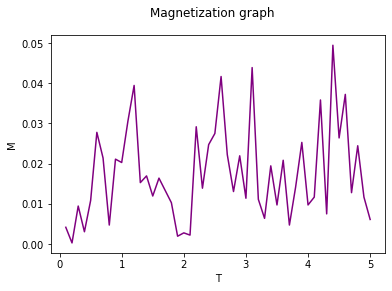

In [15]:
a = df['T']
b = df['M']
plt.xlabel('T')
plt.ylabel('M')
plt.plot(a, b, color = 'purple', lw = 1.5)
plt.suptitle('Magnetization graph')
plt.show()